In [17]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # self.layers = nn.Sequential(
        #     nn.Flatten(),
        #     nn.Linear(28*28, 16),
        #     nn.ReLU(),
        #     nn.Linear(16, 16),
        #     nn.ReLU(),
        #     nn.Linear(16, 10),
        #)
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(28*28, 16) # 12560 parameters
        self.layer2 = nn.Linear(16, 16) # 272 parameters
        self.layer3 = nn.Linear(16, 10) # 170 parameters
        # Total parameter count = 13002 parameters

    def forward(self, x):
        x = self.flatten(x)
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        return x

# Create the model
model = MLP()

# Create a loader with the MNIST dataset
transform = transforms.ToTensor()
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Split dataset into training and validation sets
train_dataset, val_dataset = random_split(dataset, [50000, 10000])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)

# Set loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
for epoch in range(20):  # number of times to loop over the dataset
    for images, labels in train_loader:
        # Convert labels to one-hot encoding
        labels_one_hot = F.one_hot(labels, num_classes=10).float()

        # Forward pass
        outputs = model(images)

        # Compute loss
        loss = loss_fn(outputs, labels_one_hot)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Training Epoch {epoch+1}, Loss: {loss.item()}')

    # Validation step
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        print(f"correct = {correct}, total={total}")
    print(f'Validation Accuracy after Epoch {epoch+1}: {accuracy}%')

Training Epoch 1, Loss: 0.041176386177539825
correct = 7859, total=10000
Validation Accuracy after Epoch 1: 78.59%
Training Epoch 2, Loss: 0.051043517887592316
correct = 8530, total=10000
Validation Accuracy after Epoch 2: 85.3%
Training Epoch 3, Loss: 0.026410484686493874
correct = 8736, total=10000
Validation Accuracy after Epoch 3: 87.36%
Training Epoch 4, Loss: 0.012758048251271248
correct = 8854, total=10000
Validation Accuracy after Epoch 4: 88.54%
Training Epoch 5, Loss: 0.025104016065597534
correct = 8935, total=10000
Validation Accuracy after Epoch 5: 89.35%
Training Epoch 6, Loss: 0.040545009076595306
correct = 8966, total=10000
Validation Accuracy after Epoch 6: 89.66%
Training Epoch 7, Loss: 0.022731544449925423
correct = 9012, total=10000
Validation Accuracy after Epoch 7: 90.12%
Training Epoch 8, Loss: 0.04358004406094551
correct = 9020, total=10000
Validation Accuracy after Epoch 8: 90.2%
Training Epoch 9, Loss: 0.01679273135960102
correct = 9063, total=10000
Validation 

tensor([[ 0.00551, -0.01491, -0.00896, -0.01533, -0.07195, -0.01376,  0.00318,
          1.08650, -0.01336,  0.06927],
        [-0.01443,  0.00870, -0.03638, -0.01584, -0.02959,  0.25960, -0.09797,
          0.01756,  0.90745, -0.01058],
        [-0.00718,  0.14484, -0.02218,  0.08249,  0.03239,  0.06027,  0.14352,
          0.06598,  0.40139,  0.02135],
        [ 0.01491, -0.02224, -0.02281,  0.84750,  0.12576,  0.01246, -0.02171,
         -0.02292,  0.04598,  0.05470],
        [-0.01157,  0.00124, -0.01287,  0.01511, -0.01439,  0.08648, -0.04112,
          0.04586,  0.95644, -0.02655],
        [-0.01149,  0.01043, -0.00311, -0.00802,  0.00345,  0.01528,  0.96609,
          0.00856,  0.00204,  0.00855],
        [ 0.01975, -0.01318, -0.01224,  0.03400, -0.01062,  0.93205,  0.06313,
          0.01365,  0.00712, -0.01659],
        [ 0.73184,  0.00531,  0.03314,  0.00239,  0.01819,  0.03965,  0.11724,
         -0.01342,  0.04932,  0.01480],
        [-0.03781, -0.00148, -0.05383, -0.05512,

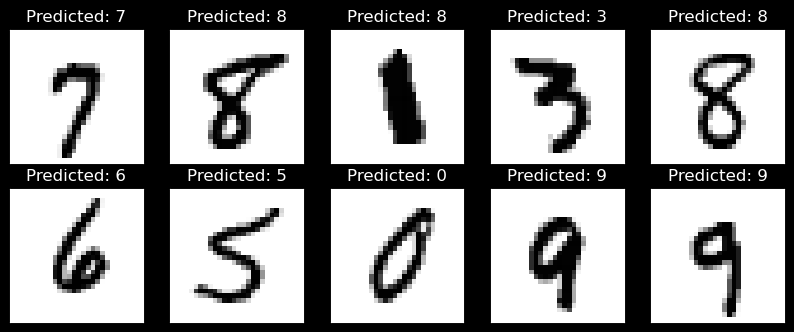

In [20]:
# Inference
model.eval()
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=True)
images, labels = next(iter(test_loader))
with torch.no_grad():
    outputs = model(images)

torch.set_printoptions(precision=5, sci_mode=False)
print(outputs)
_, predicted = torch.max(outputs, 1)

# Plot the images with the predicted labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title('Predicted: ' + str(predicted[i].item()))
plt.show()

In [21]:
for i in model.parameters():
    print(i)
    print(i.size())

Parameter containing:
tensor([[-0.01570, -0.00571,  0.02450,  ...,  0.00954, -0.00372, -0.01433],
        [ 0.01766,  0.00176,  0.01294,  ..., -0.00512,  0.02369,  0.03548],
        [-0.03390, -0.02616, -0.00620,  ...,  0.03345,  0.01065, -0.03419],
        ...,
        [ 0.02133,  0.01285,  0.02884,  ..., -0.02320, -0.00834, -0.01910],
        [ 0.02632, -0.03168,  0.00221,  ...,  0.02770, -0.01097,  0.00741],
        [ 0.02169, -0.01919,  0.03168,  ..., -0.02277,  0.02588,  0.03287]],
       requires_grad=True)
torch.Size([16, 784])
Parameter containing:
tensor([ 0.08807,  0.16101,  0.19575,  0.05477, -0.08889,  0.06146, -0.00615,
        -0.02783,  0.19450,  0.26542,  0.03430,  0.07379,  0.16189, -0.01809,
         0.02189,  0.15305], requires_grad=True)
torch.Size([16])
Parameter containing:
tensor([[    -0.06612,     -0.01953,     -0.28005,      0.18817,      0.15320,
             -0.18473,     -0.26649,     -0.30163,      0.32272,     -0.20970,
             -0.36208,      0.13741